In [2]:
import scipy.io
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from scipy import signal

In [3]:
x1 = scipy.io.loadmat(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment 3\original_ECG.mat")
x1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 13 11:22:04 2015',
 '__version__': '1.0',
 '__globals__': [],
 'original': array([[39.60475775, 40.07076881, 40.5922544 , ..., 54.22427311,
         58.8477386 , 62.91896577]])}

In [4]:
x1 = x1['original'][0]
x1

array([39.60475775, 40.07076881, 40.5922544 , ..., 54.22427311,
       58.8477386 , 62.91896577])

In [5]:
len(x1)

10000

In [6]:
# which means 10000 samples we have and we are sampling at 1000 samples per sec. 
# so we can say its a 10sec signal 

In [7]:
Fs = 1000
N = len(x1)
t = np.linspace(0,N/Fs,N) # so time varies from 0 to 10sec

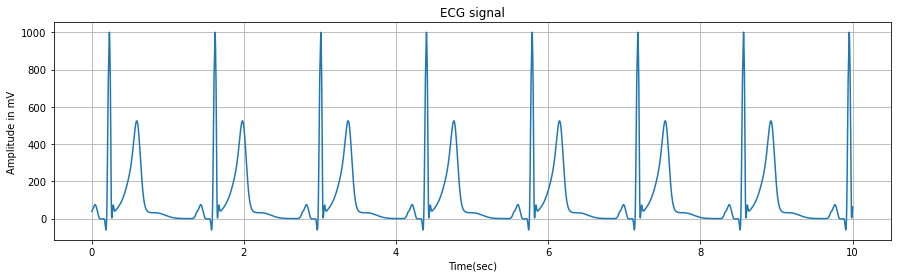

In [8]:

plt.figure(figsize=(15,4))
plt.plot(t,x1)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude in mV')
plt.title('ECG signal')
plt.grid(True)
plt.show()

In [9]:
# finding DFT 

def DFT(x,Fs):
    N = len(x)
    k = np.arange(N)
    timePeriod = N/Fs
    frequencies = k*(Fs/N)
    
    x_dft = np.fft.fft(x)/len(x)
    
    magnitude = np.abs(x_dft)
    
    return frequencies,magnitude

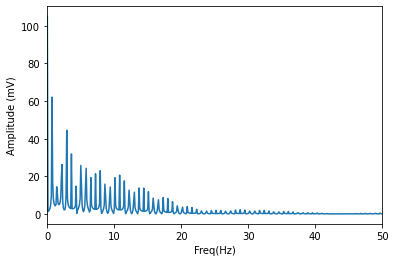

In [10]:
f,m = DFT(x1,Fs)
plt.plot(f,m)
plt.xlim(0,50)
plt.xlabel('Freq(Hz)')
plt.ylabel('Amplitude (mV)')
plt.show()

In [11]:
# windowing 

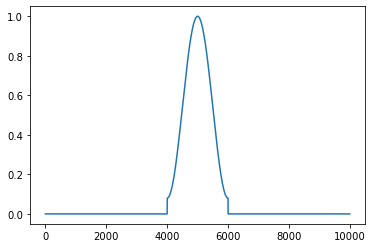

In [12]:
# 1. Hamming window 
L = 2000 # length of the window 
window = np.zeros(N)

for i in range(L):
    window[i] = 0.54 - 0.46*np.cos(2*np.pi*i/(L-1))
    
win_ham = np.zeros(N)
for i in range(N):
    win_ham[i] = window[i-int((N-L)/2)]
    
plt.plot(win_ham)

(0.0, 50.0)

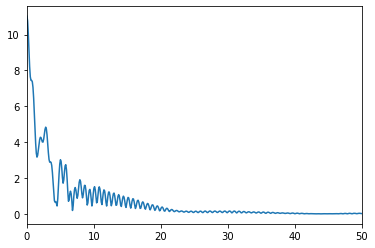

In [13]:
x_hamming = np.multiply(x1,win_ham) # multiplying time domain signal with hamming window so that the spectra will be smooth without any discontinuities

freq, mag = DFT(x_hamming, Fs)


plt.plot(freq , mag)
plt.xlim(0,50)


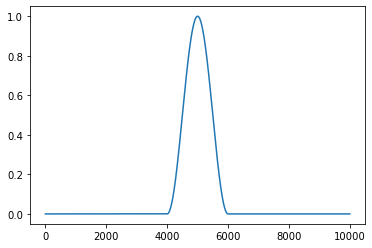

In [14]:
# Hanning window 
L = 2000 # length of the window 
win = np.zeros(N)

for i in range(L):
    win[i] = 0.5 - 0.5*np.cos(2*np.pi*i/(L-1))
    
win_han = np.zeros(N)
for i in range(N):
    win_han[i] = win[i-int((N-L)/2)]
    
plt.plot(win_han)


(0.0, 50.0)

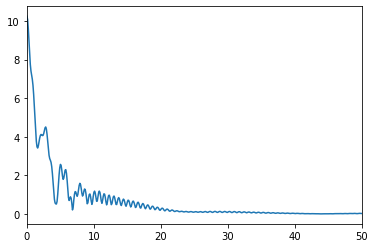

In [15]:
x_hanning = np.multiply(x1, win_han)

freq, mag = DFT(x_hanning , Fs)

plt.plot(freq, mag)
plt.xlim(0,50)

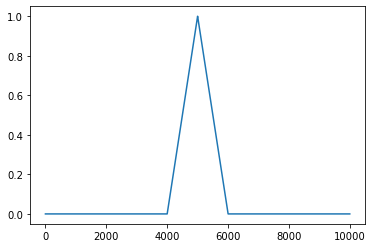

In [16]:
# Barlett window 
L = 2000
window = np.zeros(N)

for i in range(L):
    window[i] = (2/(L-1))*(((L-1)/2)-abs(i-((L-1)/2)))
    
win_bart = np.zeros(N)
for i in range(N):
    win_bart[i] = window[i-int((N-L)/2)]
    
plt.plot(win_bart)

(0.0, 50.0)

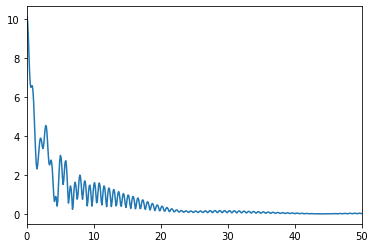

In [17]:
x_bartlett = np.multiply(x1,win_bart)
freq, mag = DFT(x_bartlett,Fs)
plt.plot(freq, mag)
plt.xlim(0,50)

## Question 2

In [18]:
X2 = scipy.io.loadmat(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment 3\givenECG3.mat")
X2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 10 19:30:32 2017',
 '__version__': '1.0',
 '__globals__': [],
 'givenECG3': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}

In [19]:
X2 = X2['givenECG3'][0]

In [20]:
X2

array([995, 995, 995, ..., 946, 944, 943], dtype=uint16)

In [21]:
Fs = 360 # given sampling frequency
N = len(X2)
t = np.linspace(0,N/Fs,N)
print(N)

3600


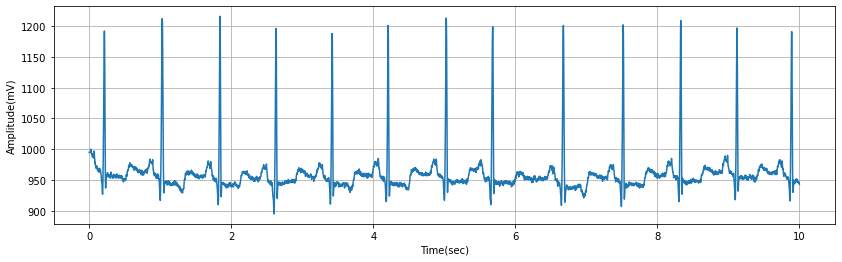

In [22]:
plt.figure(figsize=(14,4))
plt.plot(t,X2)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude(mV)')
plt.grid(True)

In [23]:
# DFT 

(0.0, 10.0)

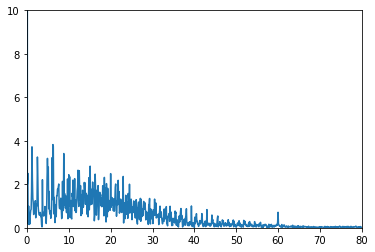

In [24]:
freq, mag = DFT(X2, Fs)
plt.plot(freq,mag)
plt.xlim(0,80)
plt.ylim(0,10)

In [25]:
# Reconstruction with reduced no.of coefficients

In [26]:
x_dft = np.fft.fft(X2)

N = len(x_dft)

x_dft1 = [0j]*N
for i in range(N):
    if i<int(0.8*N):
        x_dft1[i] = x_dft[i]
        
    else:
        x_dft1[i] = 0
        
x_dft2 = [0j]*N
for i in range(N):
    if i<int(0.6*N):
        x_dft2[i] = x_dft[i]
    else:
        x_dft2[i] = 0
        
x_dft3 = [0j]*N
for i in range(N):
    if i<int(0.4*N):
        x_dft3[i] = x_dft[i]
    else:
        x_dft3[i] = 0

x1 = np.fft.ifft(x_dft1)
x2 = np.fft.ifft(x_dft2)
x3 = np.fft.ifft(x_dft3)

t = np.linspace(0,N/Fs,N)


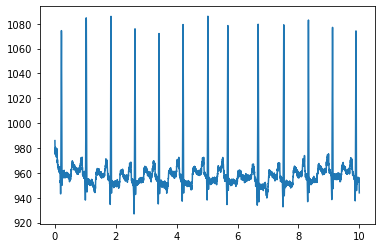

In [27]:
plt.plot(t,abs(x1))

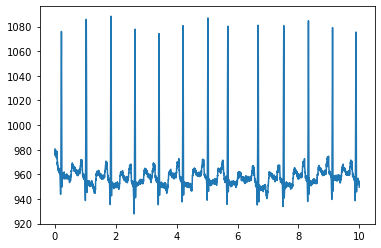

In [28]:
plt.plot(t,abs(x2))

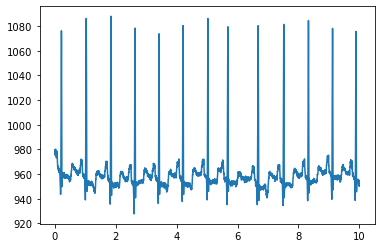

In [29]:
plt.plot(t,abs(x3))

In [30]:
# computing percentage root mean square difference (PRD)
from sklearn.metrics import mean_squared_error
PRD1 = mean_squared_error(X2, abs(x1),squared = False)
print('with 80% reconstructed signal is : ', PRD1)
PRD2 = mean_squared_error(X2, abs(x2),squared=False)
print('with 60% reconstructed signal is : ', PRD2)
PRD3 = mean_squared_error(X2, abs(x3), squared=False)
print('with 40% reconstructed signal is : ', PRD3)

with 80% reconstructed signal is :  16.79293848744224
with 60% reconstructed signal is :  16.80066397975879
with 40% reconstructed signal is :  16.80837153657254


In [31]:
# the same with DCT instead of DFT

In [32]:
from scipy import fft
from scipy.fftpack import dct, idct

In [33]:
X_dct = dct(X2)

(0.0, 50000.0)

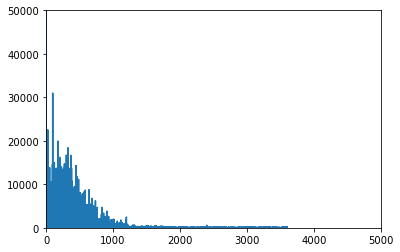

In [34]:
plt.plot(X_dct)
plt.xlim(0,5000)
plt.ylim(0,50000)

In [35]:
#inverse dct 

In [36]:
N = len(X_dct)            # Total DCT Coefficients
N1 = int(0.8*N)           # 80% of total DCT Coefficients
N2 = int(0.6*N)           # 60% of total DCT Coefficients
N3 = int(0.4*N)           # 40% of total DCT Coefficients

# Computing Inverse DCT
X_reconstructed1 = idct(X_dct,n=N1)
X_reconstructed2 = idct(X_dct,n=N2)
X_reconstructed3 = idct(X_dct,n=N3)

In [37]:
X_dct = dct(X2)

N = len(X_dct)

X_dct1 = [0j]*N
for i in range(N):
    if i<int(0.8*N):
        X_dct1[i] = X_dct[i]
        
        
X_dct2 = [0j]*N
for i in range(N):
    if i<int(0.6*N):
        X_dct2[i] = X_dct[i]
        
        
X_dct3 = [0j]*N
for i in range(N):
    if i<int(0.4*N):
        X_dct3[i] = X_dct[i]
        

# Computing Inverse DFT
x1_ = idct(X_dct1)
x2_ = idct(X_dct2)
x3_ = idct(X_dct3)


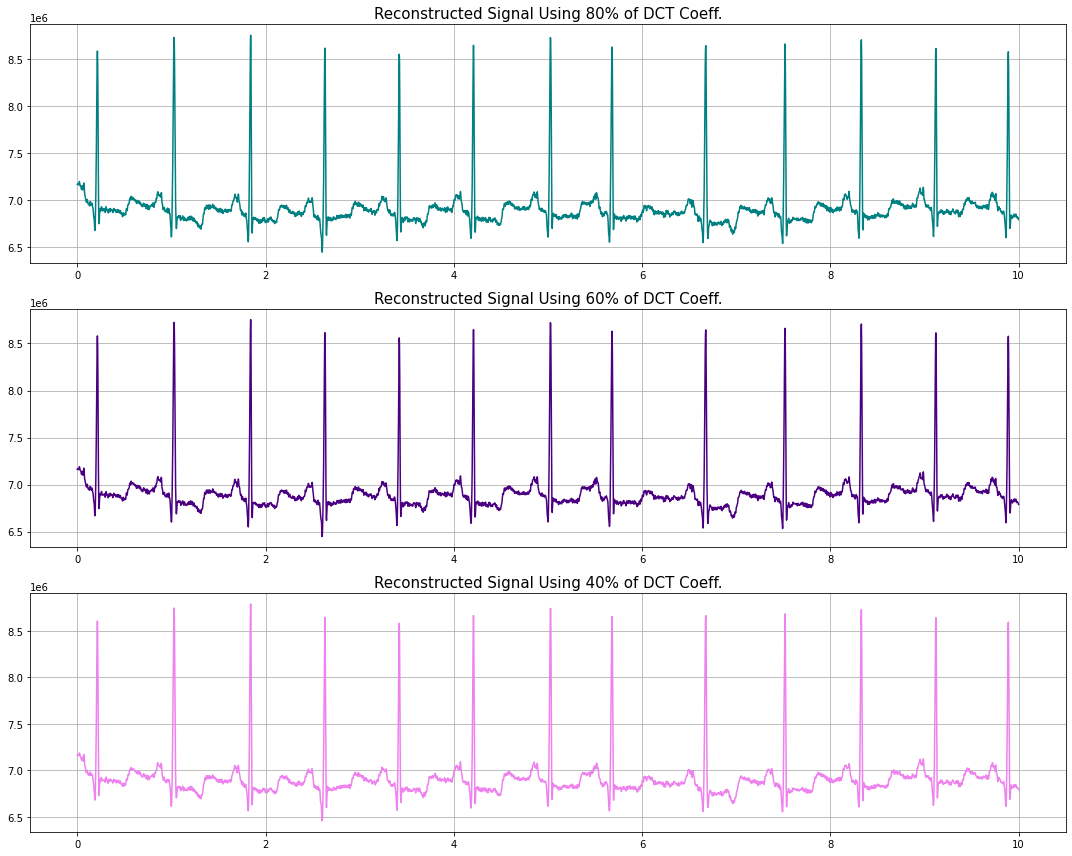

In [38]:
plt.figure(figsize=(15,12))

t = np.linspace(0,N/Fs,N)
plt.subplot(3,1,1)
plt.plot(t,abs(x1_), color='teal')
plt.title('Reconstructed Signal Using 80% of DCT Coeff.', size=15)
plt.grid()

t2 = np.linspace(0,N/Fs,N2)
plt.subplot(3,1,2)
plt.plot(t,abs(x2_), color='indigo')
plt.title('Reconstructed Signal Using 60% of DCT Coeff.', size=15)
plt.grid()

t3 = np.linspace(0,N/Fs,N3)
plt.subplot(3,1,3)
plt.plot(t,abs(x3_), color='violet')
plt.title('Reconstructed Signal Using 40% of DCT Coeff.', size=15)
plt.grid()

plt.tight_layout()
plt.show()

In [39]:
# for dft 

In [40]:
# computing wavelet energy based diagnostic distortion measured (WEDD)

In [41]:
# WEDD(l) = sum ( wl x WPRDl ) for l = 1 to L+1

In [42]:
import pywt
# wavelet energy weight vector is computed via five level bioorthogonal DWT


In [43]:
coeffs = pywt.wavedec(X2,'bior1.1',level=5) # five level decomposition structure is chosen

In [44]:
# Approximate and detailed coeffs 

In [45]:
A5,D5, D4, D3, D2, D1 = coeffs

In [46]:
D = [D1, D2, D3, D4, D5, A5]
K1 = len(D1)
K2 = len(D2)
K3 = len(D3)
K4 = len(D4)
K5 = len(D5)
K6 = len(A5)
K = [K1, K2, K3, K4, K5, K6]

In [47]:
# computing weights of various subbands:

In [48]:
Num = np.zeros(6)
Den = 0

In [49]:
for l in range(6):
    for i in range(K[l]):
        Num[l] += D[l][i]**2
    Den += Num[l]

    w = np.zeros(6)
    for l in range(6):
        w[l] = Num[l]/Den

$$ WPRD_l = \sqrt{\frac{\sum_{k=1}^{K_l}{d_l(k)- \tilde{d}_l(k)}^2} {\sum_{m=1}^{L+1}\sum_{k=1}^{K_l}{d^2_m(k)}}}
$$



In [50]:
coeffs = pywt.wavedec(x1,'bior1.1',level=5)   #Five Level decomposition structure is chosen 

# Approximate and Detailed Coeffs
A5_, D5_, D4_, D3_, D2_, D1_ = coeffs

D_ = [D1_, D2_, D3_, D4_, D5_, A5_]

K1 = len(D1_)
K2 = len(D2_)
K3 = len(D3_)
K4 = len(D4_)
K5 = len(D5_)
K6 = len(A5_)

K = [K1,K2,K3,K4,K5,K6]

'''
The error between the Wavelet coefficients of the original signal and Wavelet coefficients of 
the reconstructed signal is calculated by percentage root mean square difference. It is referred 
to as Wavelet PRD (WPRD).
'''
# Computing WPRD
WPRD = [0j]*6
Num = [0j]*6
Den = [0j]*6

for l in range(6):
    for i in range(K[l]):
        # D[l][k] is the kth Wavelet coefficient of the original signal in lth subband
        # D_[l][k] is the kth Wavelet coefficient of the reconstructed signal in lth subband
        Num[l] += (D[l][i] - D_[l][i])**2
        Den[l] += D[l][i]**2
        
    
    WPRD[l] = np.sqrt(Num[l]/Den[l])  # WPRD[l] is the error in the lth subband
    

In [51]:
print(WPRD[l])

(0.004374669710606531+0.0006141066399240146j)


In [52]:
# WEDD

In [53]:
coeffs = pywt.wavedec(x1_,'bior1.1',level=5)  

# Approximate and Detailed Coeffs
A5_, D5_, D4_, D3_, D2_, D1_ = coeffs

D_ = [D1_, D2_, D3_, D4_, D5_, A5_]

K1 = len(D1_)
K2 = len(D2_)
K3 = len(D3_)
K4 = len(D4_)
K5 = len(D5_)
K6 = len(A5_)

K = [K1,K2,K3,K4,K5,K6]

# Computing Weighted PRD (WPRD)
WPRD = [0j]*6
Num = [0j]*6
Den = [0j]*6

for l in range(6):
    for i in range(K[l]):
        # D[l][k] is the kth Wavelet coefficient of the original signal in lth subband
        # D_[l][k] is the kth Wavelet coefficient of the reconstructed signal in lth subband
        Num[l] += (D[l][i] - D_[l][i])**2   
        Den[l] += D[l][i]**2
        
    
    WPRD[l] = np.sqrt(Num[l]/Den[l])
    

In [54]:
WEDD = [0j]*6

for l in range(6):
    WEDD[l] += w[l]*WPRD[l]
    
print(f'\nWEDD values of the reconstructed signal for first subband: {abs(WEDD[0]):.2f}')
print(f'\nWEDD values of the reconstructed signal for second subband: {abs(WEDD[1]):.2f}')
print(f'\nWEDD values of the reconstructed signal for third subband: {abs(WEDD[2]):.2f}')
print(f'\nWEDD values of the reconstructed signal for fourth subband: {abs(WEDD[3]):.2f}')
print(f'\nWEDD values of the reconstructed signal for fifth subband: {abs(WEDD[4]):.2f}')
#print(f'\nWEDD values of the reconstructed signal for sixth subband: {WEDD[5]:.2f}')



WEDD values of the reconstructed signal for first subband: 0.20

WEDD values of the reconstructed signal for second subband: 0.76

WEDD values of the reconstructed signal for third subband: 1.60

WEDD values of the reconstructed signal for fourth subband: 3.07

WEDD values of the reconstructed signal for fifth subband: 1.57
